In [1]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [4]:
x_train = x_train/127.5 - 1.0
x_test = x_test/127.5 - 1.0
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [5]:
def generator(x):
    with tf.variable_scope("G", reuse = tf.AUTO_REUSE):
        x = tf.cast(x,tf.float32)
        dense_1 = tf.layers.dense(x,256)
        relu_1 = tf.nn.leaky_relu(dense_1,alpha=0.2)
        batch_1 = tf.layers.batch_normalization(relu_1,momentum=0.8)
        dense_2 = tf.layers.dense(batch_1,512)
        relu_2 = tf.nn.leaky_relu(dense_2,alpha=0.2)
        batch_2 = tf.layers.batch_normalization(relu_2,momentum=0.8)
        dense_3 = tf.layers.dense(batch_2,1024)
        relu_3 = tf.nn.leaky_relu(dense_3,alpha=0.2)
        batch_3 = tf.layers.batch_normalization(relu_3,momentum=0.8)
        dense_4 = tf.layers.dense(batch_3,784)
        tanh_1 = tf.nn.tanh(dense_4)
        out = tf.reshape(tanh_1,(-1,28,28,1))
    return out

In [6]:
def discriminator(x):
    with tf.variable_scope("D", reuse = tf.AUTO_REUSE):
        x = tf.cast(x,tf.float32)
        model = tf.layers.flatten(x)
        model = tf.layers.dense(model,512)
        model = tf.nn.leaky_relu(model,alpha=0.2)
        model = tf.layers.dense(model,256)
        model = tf.nn.leaky_relu(model,alpha=0.2)
        model = tf.layers.dense(model,1)
        #model = tf.nn.sigmoid(model)
    return model

In [7]:
inp_dis = tf.placeholder(dtype=tf.float32, shape=[None, 28,28,1])
inp_gen = tf.placeholder(dtype=tf.float32, shape=[None, 100])

fake_imgs = generator(inp_gen)

disc_logits_real = discriminator(inp_dis)
disc_logits_fake = discriminator(fake_imgs)

disc_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake, 
                                                                            labels=tf.zeros_like(disc_logits_fake)))
disc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_real, 
                                                                            labels=tf.ones_like(disc_logits_real)))
disc_loss = tf.add(disc_loss_fake, disc_loss_real)

gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake, 
                                                                      labels=tf.ones_like(disc_logits_fake)))
t_vars = tf.trainable_variables()
D_vars = [var for var in t_vars if 'D' in var.name]
G_vars = [var for var in t_vars if 'G' in var.name]
train_disc = tf.train.AdamOptimizer(0.001, 0.5).minimize(disc_loss,var_list=D_vars)
train_gen = tf.train.AdamOptimizer(0.001, 0.5).minimize(gen_loss,var_list=G_vars)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.flatten instead.


In [8]:
epochs = 5000
batch_size = 100
gen_test = np.random.normal(0, 1, (25, 100))
c = 5
r = 5

In [9]:
def train(x_train,y_train):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    train_writer = tf.summary.FileWriter('./logs')
    train_writer.add_graph(tf.get_default_graph())
#     train_disc, train_gen, disc_loss, gen_loss = GAN()
    for ix in range(epochs):
        idx = np.random.randint(0, len(x_train), batch_size)
        batch_real = x_train[idx]
        batch_gen = np.random.normal(0, 1, (batch_size, 100))
        _, d_loss = sess.run([train_disc, disc_loss],
                                      feed_dict={inp_dis: batch_real, inp_gen: batch_gen})

        batch_gen = np.random.normal(0, 1, (batch_size, 100))
        _, g_loss = sess.run([train_gen, gen_loss], feed_dict={inp_gen: batch_gen})
        if(ix % 50 == 0):
            print("Epoch: " + str(ix) + " Discriminator loss: " + str(d_loss) + " Generator loss: " + str(g_loss))
            gen_images = sess.run(fake_imgs, feed_dict={inp_gen: gen_test})
            fig, axs = plt.subplots(c, r)
            cnt = 0
            for i in range(c):
                for j in range(r):
                    axs[i, j].imshow(gen_images[cnt, :, :, 0], cmap="gray")
                    axs[i, j].axis('off')
                    cnt += 1
            plt.show()

Epoch: 0 Discriminator loss: 1.7034754 Generator loss: 0.69296044


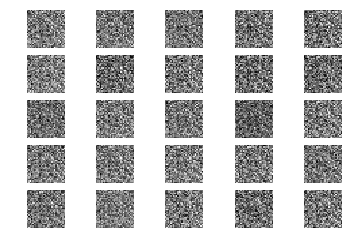

Epoch: 50 Discriminator loss: 1.2794433 Generator loss: 1.6026839


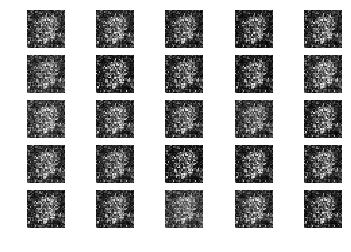

Epoch: 100 Discriminator loss: 1.4934475 Generator loss: 0.72655076


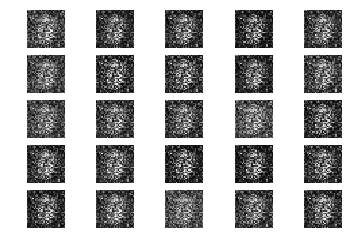

Epoch: 150 Discriminator loss: 1.045171 Generator loss: 1.2153611


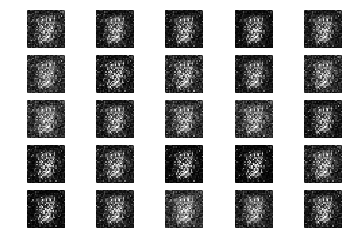

Epoch: 200 Discriminator loss: 0.8756715 Generator loss: 1.3171924


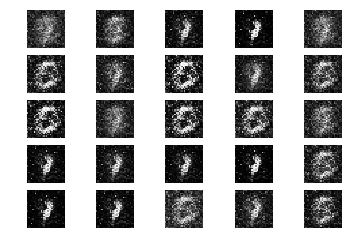

Epoch: 250 Discriminator loss: 1.087592 Generator loss: 1.276288


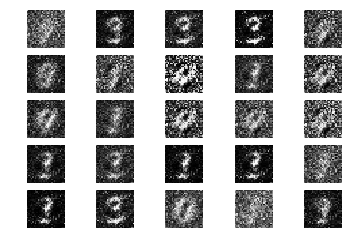

Epoch: 300 Discriminator loss: 0.98230875 Generator loss: 1.0649498


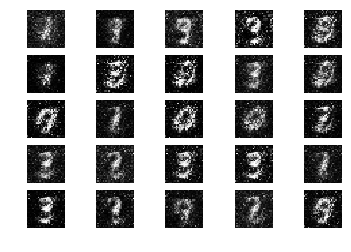

Epoch: 350 Discriminator loss: 1.4140826 Generator loss: 0.4859029


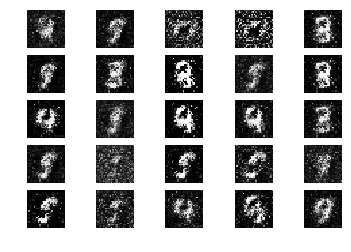

Epoch: 400 Discriminator loss: 1.6754255 Generator loss: 1.004348


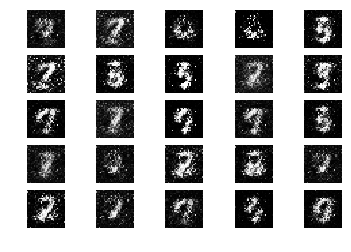

Epoch: 450 Discriminator loss: 1.3507853 Generator loss: 1.8716258


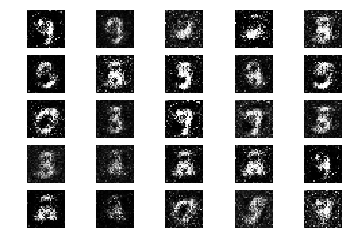

Epoch: 500 Discriminator loss: 1.642194 Generator loss: 1.2203599


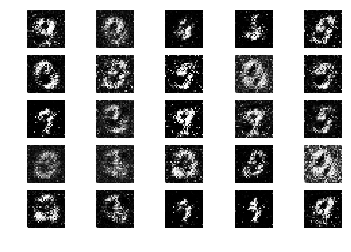

Epoch: 550 Discriminator loss: 1.0471038 Generator loss: 1.0672559


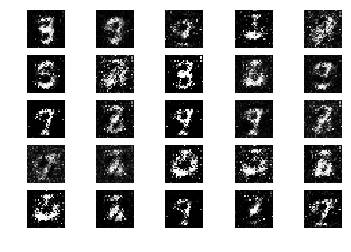

Epoch: 600 Discriminator loss: 1.1130499 Generator loss: 1.2481009


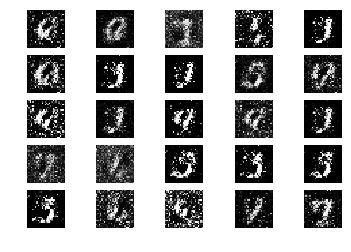

Epoch: 650 Discriminator loss: 1.2073772 Generator loss: 1.0952545


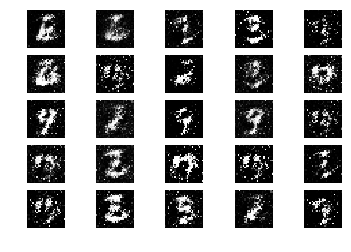

Epoch: 700 Discriminator loss: 1.1124499 Generator loss: 1.0015205


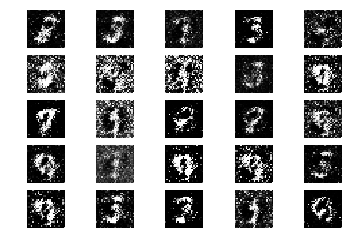

Epoch: 750 Discriminator loss: 1.2551923 Generator loss: 1.1195271


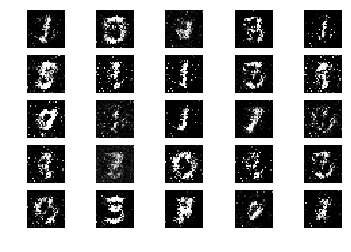

Epoch: 800 Discriminator loss: 1.2238646 Generator loss: 1.1221468


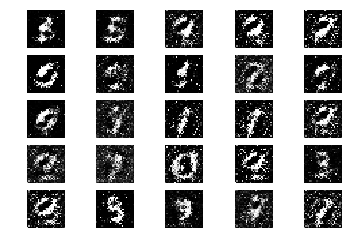

Epoch: 850 Discriminator loss: 1.0324668 Generator loss: 1.5119809


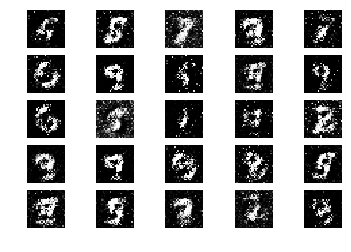

Epoch: 900 Discriminator loss: 1.1686537 Generator loss: 0.93546784


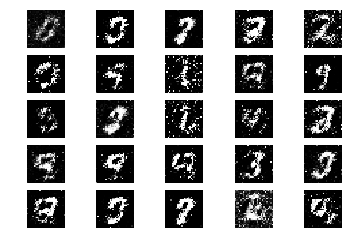

Epoch: 950 Discriminator loss: 1.1350429 Generator loss: 1.1181121


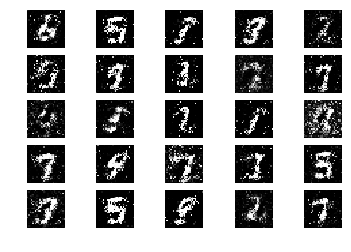

Epoch: 1000 Discriminator loss: 1.0151374 Generator loss: 0.95335424


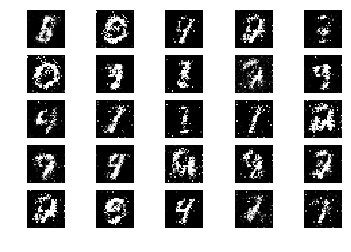

Epoch: 1050 Discriminator loss: 1.1268953 Generator loss: 1.5375956


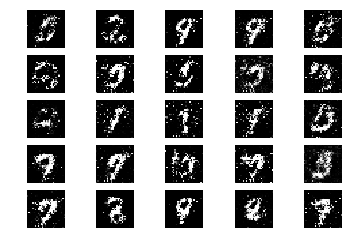

Epoch: 1100 Discriminator loss: 1.2628918 Generator loss: 2.5410542


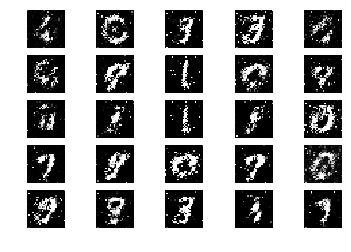

Epoch: 1150 Discriminator loss: 1.0285361 Generator loss: 1.1366186


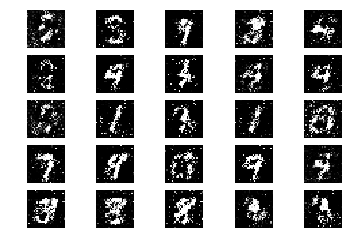

Epoch: 1200 Discriminator loss: 1.0533321 Generator loss: 1.1762236


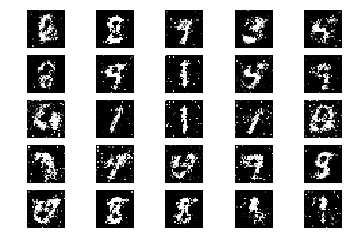

Epoch: 1250 Discriminator loss: 1.1347141 Generator loss: 1.5397782


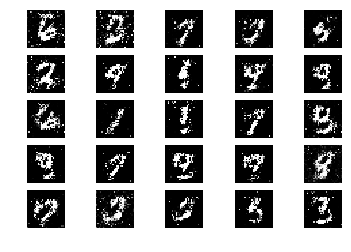

Epoch: 1300 Discriminator loss: 0.9868534 Generator loss: 1.7650843


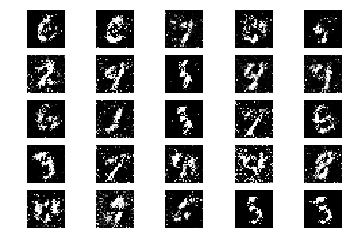

Epoch: 1350 Discriminator loss: 1.0595449 Generator loss: 1.2638793


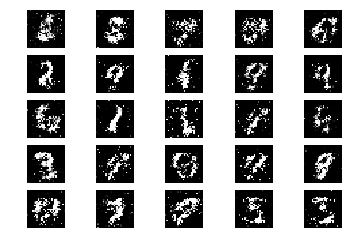

Epoch: 1400 Discriminator loss: 1.0652719 Generator loss: 0.8495679


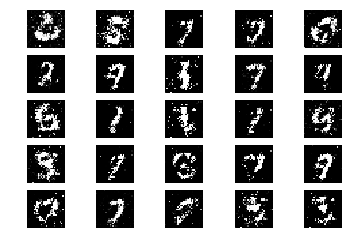

Epoch: 1450 Discriminator loss: 1.4938475 Generator loss: 1.5000223


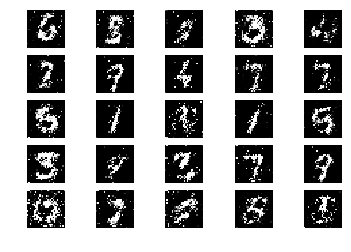

Epoch: 1500 Discriminator loss: 1.0803957 Generator loss: 1.3484181


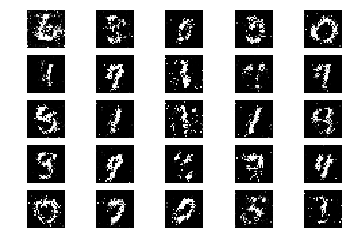

Epoch: 1550 Discriminator loss: 1.1322172 Generator loss: 1.2036939


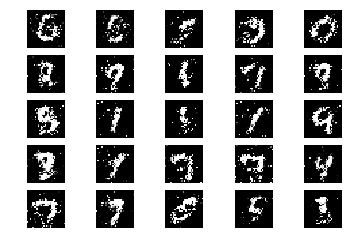

Epoch: 1600 Discriminator loss: 1.1102203 Generator loss: 1.3572757


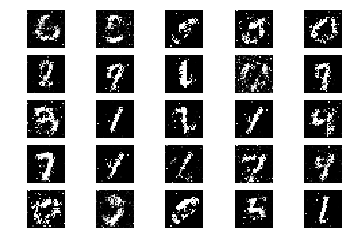

Epoch: 1650 Discriminator loss: 1.1939172 Generator loss: 1.4506826


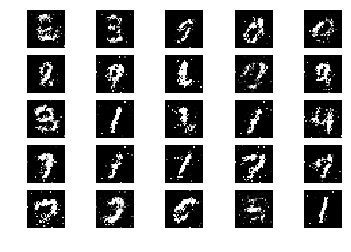

Epoch: 1700 Discriminator loss: 1.0239868 Generator loss: 1.2179505


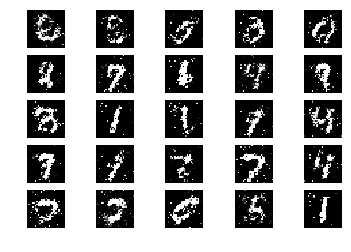

Epoch: 1750 Discriminator loss: 1.153807 Generator loss: 1.1282763


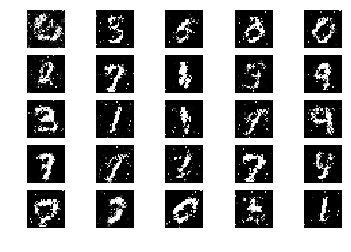

Epoch: 1800 Discriminator loss: 1.2627361 Generator loss: 1.1508651


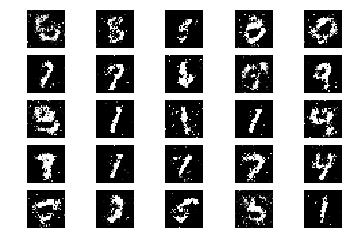

Epoch: 1850 Discriminator loss: 1.1500862 Generator loss: 0.92450434


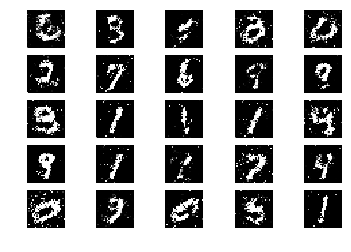

Epoch: 1900 Discriminator loss: 1.3132184 Generator loss: 0.27906117


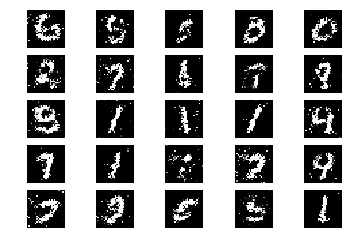

Epoch: 1950 Discriminator loss: 1.1553618 Generator loss: 0.9511877


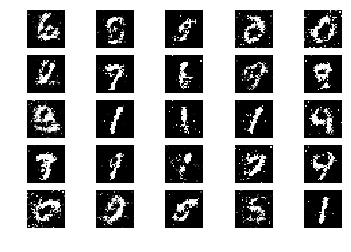

Epoch: 2000 Discriminator loss: 1.1246892 Generator loss: 1.4150047


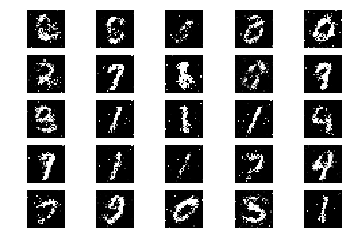

Epoch: 2050 Discriminator loss: 1.1435058 Generator loss: 0.9299591


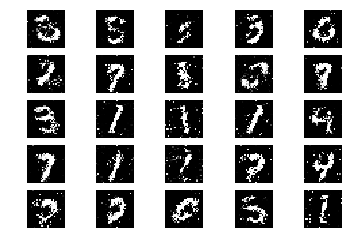

Epoch: 2100 Discriminator loss: 1.0917658 Generator loss: 0.9571608


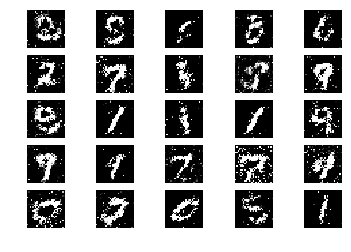

Epoch: 2150 Discriminator loss: 1.1593218 Generator loss: 1.2953016


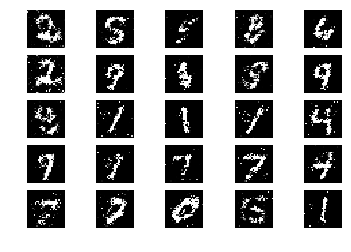

Epoch: 2200 Discriminator loss: 1.1869986 Generator loss: 0.93543196


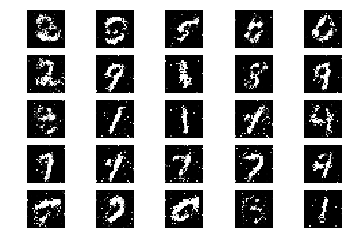

Epoch: 2250 Discriminator loss: 1.2455486 Generator loss: 1.30611


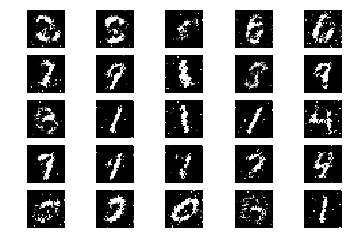

Epoch: 2300 Discriminator loss: 1.180843 Generator loss: 1.0513813


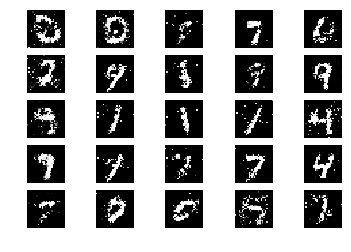

Epoch: 2350 Discriminator loss: 1.1522274 Generator loss: 0.9494159


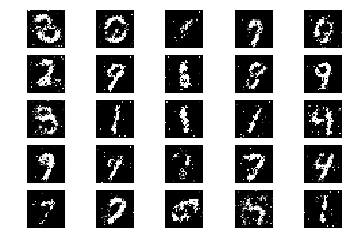

Epoch: 2400 Discriminator loss: 1.5773878 Generator loss: 1.3345501


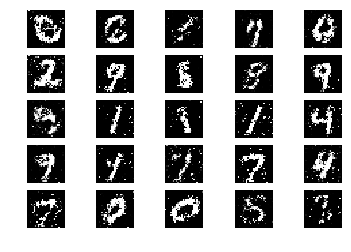

Epoch: 2450 Discriminator loss: 1.2267706 Generator loss: 0.66414595


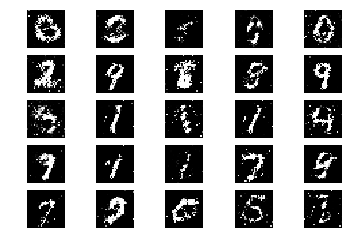

Epoch: 2500 Discriminator loss: 1.2788752 Generator loss: 0.97317237


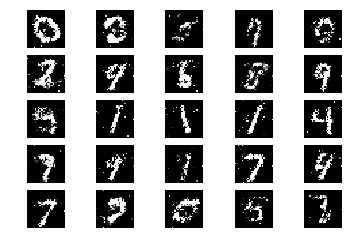

Epoch: 2550 Discriminator loss: 1.3120975 Generator loss: 1.1298217


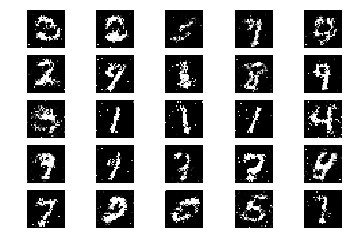

Epoch: 2600 Discriminator loss: 1.3714038 Generator loss: 1.6956829


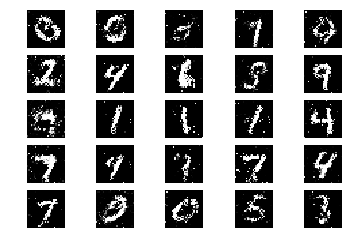

Epoch: 2650 Discriminator loss: 1.2837076 Generator loss: 0.8034693


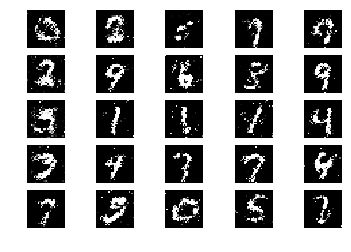

Epoch: 2700 Discriminator loss: 1.105005 Generator loss: 1.1005577


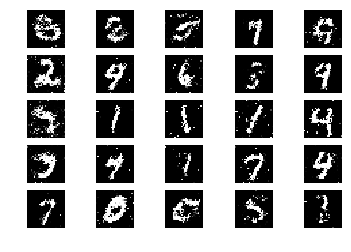

Epoch: 2750 Discriminator loss: 1.1286712 Generator loss: 0.8332042


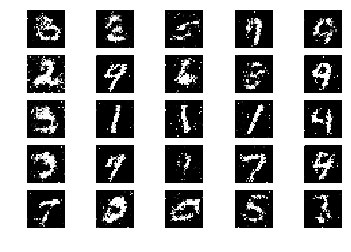

Epoch: 2800 Discriminator loss: 1.1928843 Generator loss: 1.1094522


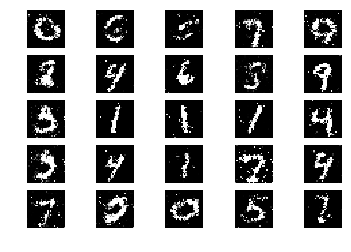

Epoch: 2850 Discriminator loss: 1.3258784 Generator loss: 1.9738376


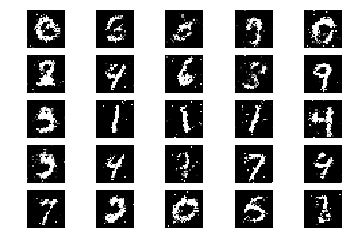

Epoch: 2900 Discriminator loss: 1.0817022 Generator loss: 1.0739001


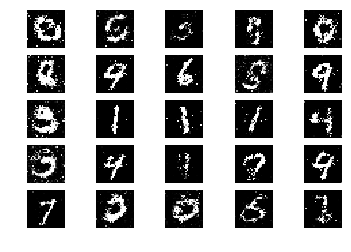

Epoch: 2950 Discriminator loss: 1.1910977 Generator loss: 1.0222363


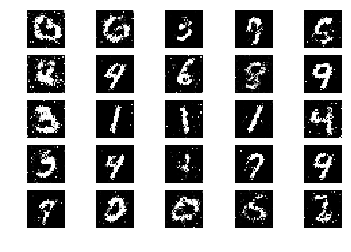

Epoch: 3000 Discriminator loss: 1.2886982 Generator loss: 0.99123293


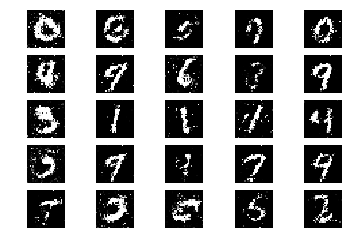

Epoch: 3050 Discriminator loss: 1.168189 Generator loss: 0.952554


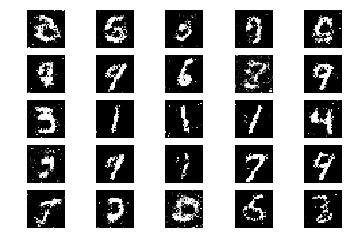

Epoch: 3100 Discriminator loss: 1.2077491 Generator loss: 1.072278


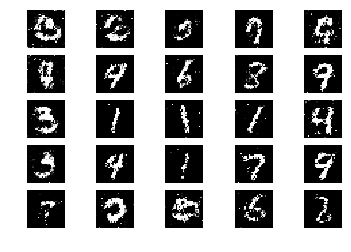

Epoch: 3150 Discriminator loss: 1.1749567 Generator loss: 1.2356021


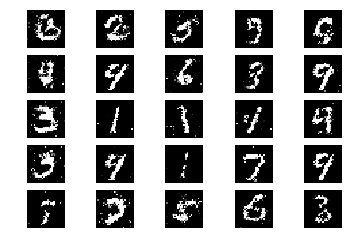

Epoch: 3200 Discriminator loss: 1.2442518 Generator loss: 1.2591395


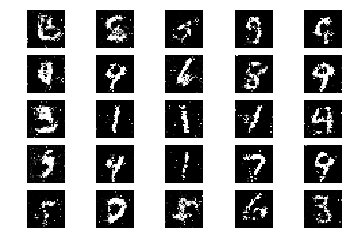

Epoch: 3250 Discriminator loss: 1.1644591 Generator loss: 1.203641


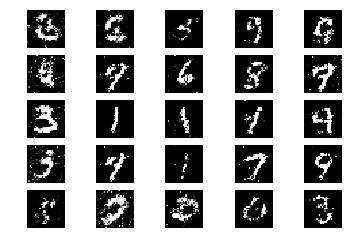

Epoch: 3300 Discriminator loss: 1.3064029 Generator loss: 0.6394731


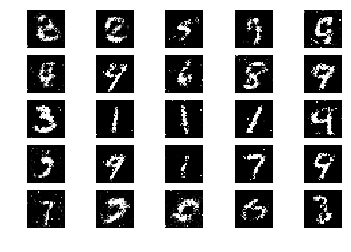

Epoch: 3350 Discriminator loss: 1.2121904 Generator loss: 1.3812103


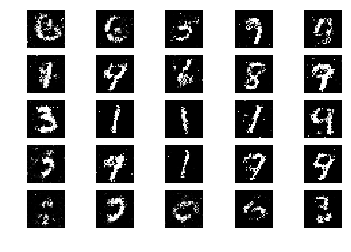

Epoch: 3400 Discriminator loss: 1.1839035 Generator loss: 0.9635211


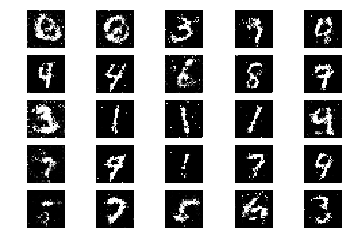

Epoch: 3450 Discriminator loss: 1.163804 Generator loss: 1.4114567


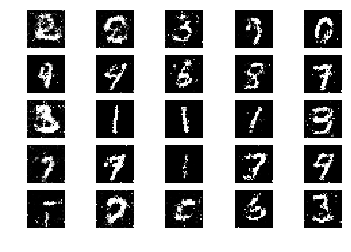

Epoch: 3500 Discriminator loss: 1.2837998 Generator loss: 0.81375945


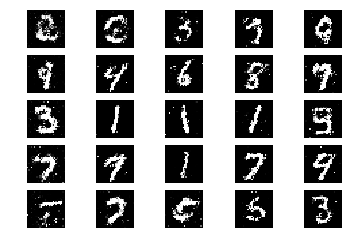

Epoch: 3550 Discriminator loss: 1.2574939 Generator loss: 1.1120782


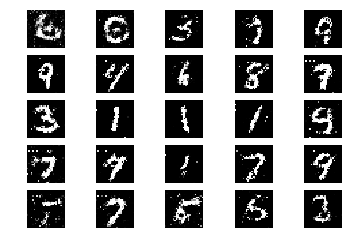

Epoch: 3600 Discriminator loss: 1.3250924 Generator loss: 0.4503563


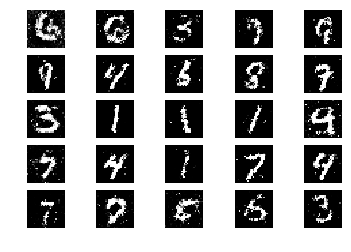

Epoch: 3650 Discriminator loss: 1.4159241 Generator loss: 1.4829468


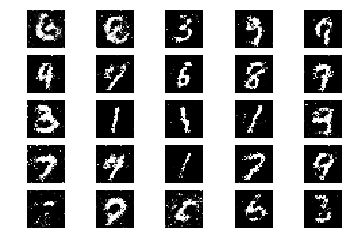

Epoch: 3700 Discriminator loss: 1.1444577 Generator loss: 0.99905616


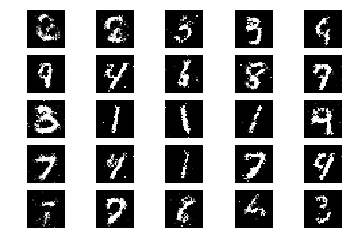

Epoch: 3750 Discriminator loss: 1.2047949 Generator loss: 0.89424217


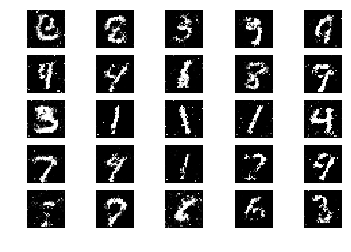

Epoch: 3800 Discriminator loss: 1.2462981 Generator loss: 0.8743624


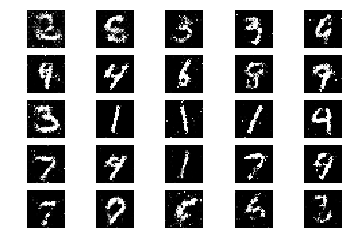

Epoch: 3850 Discriminator loss: 1.2117273 Generator loss: 1.0389827


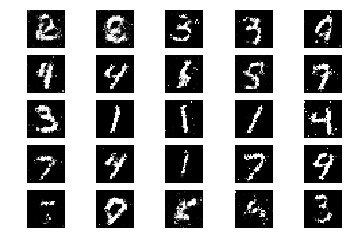

Epoch: 3900 Discriminator loss: 1.2179866 Generator loss: 0.76670665


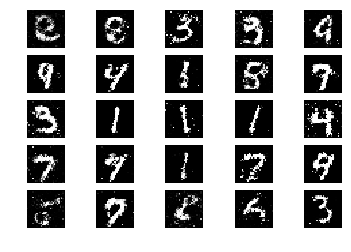

Epoch: 3950 Discriminator loss: 1.280609 Generator loss: 1.0276153


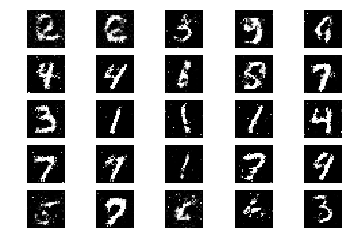

Epoch: 4000 Discriminator loss: 1.1739297 Generator loss: 1.053578


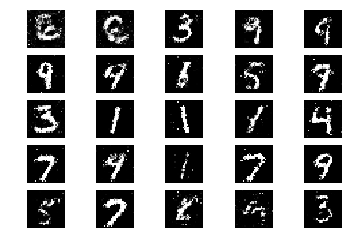

Epoch: 4050 Discriminator loss: 1.1724366 Generator loss: 1.020365


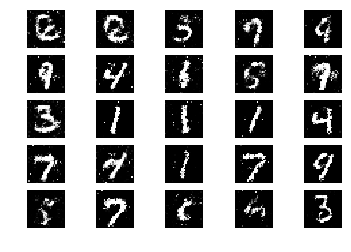

Epoch: 4100 Discriminator loss: 1.2718855 Generator loss: 0.89620215


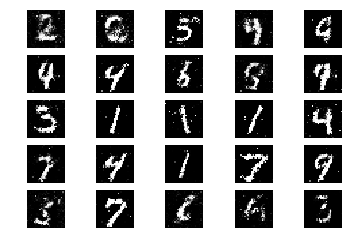

Epoch: 4150 Discriminator loss: 1.173836 Generator loss: 0.87012064


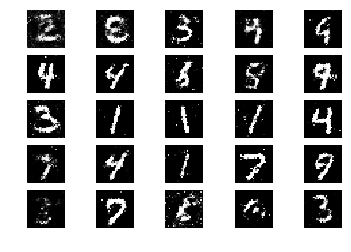

Epoch: 4200 Discriminator loss: 1.4576721 Generator loss: 0.8762188


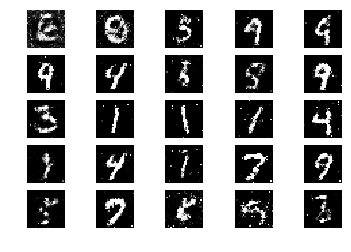

Epoch: 4250 Discriminator loss: 1.3235993 Generator loss: 0.8543575


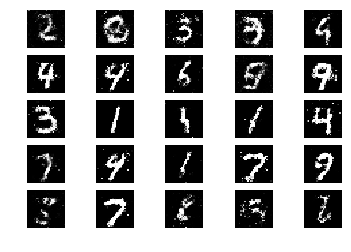

Epoch: 4300 Discriminator loss: 1.2633919 Generator loss: 1.0402092


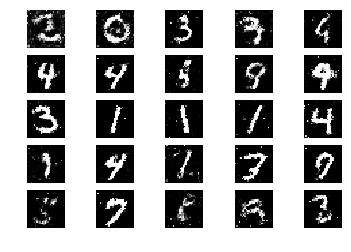

Epoch: 4350 Discriminator loss: 1.2229015 Generator loss: 0.97021544


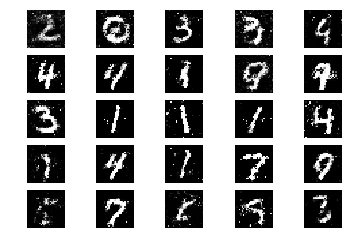

Epoch: 4400 Discriminator loss: 1.2562366 Generator loss: 0.89617324


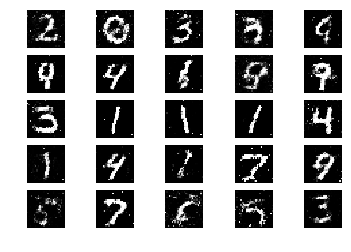

Epoch: 4450 Discriminator loss: 1.2296505 Generator loss: 1.4298186


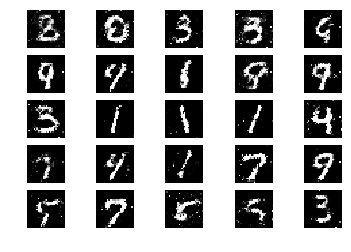

Epoch: 4500 Discriminator loss: 1.2705113 Generator loss: 1.0413344


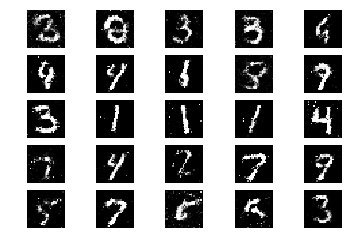

Epoch: 4550 Discriminator loss: 1.2989211 Generator loss: 0.887789


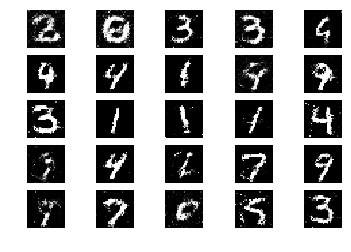

Epoch: 4600 Discriminator loss: 1.4281496 Generator loss: 1.3486029


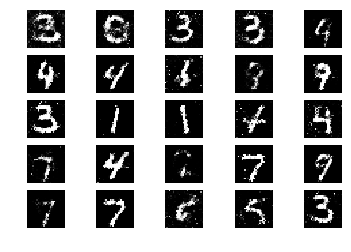

Epoch: 4650 Discriminator loss: 1.273323 Generator loss: 1.0677924


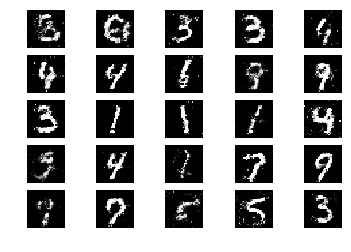

Epoch: 4700 Discriminator loss: 1.2681161 Generator loss: 0.847624


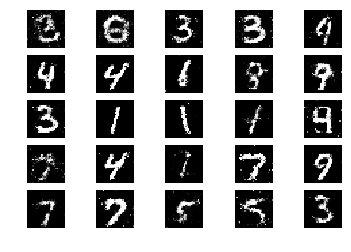

Epoch: 4750 Discriminator loss: 1.3135185 Generator loss: 0.84114283


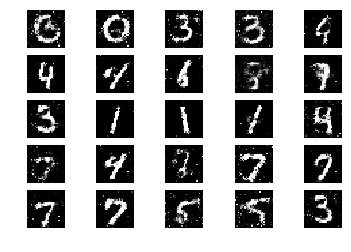

Epoch: 4800 Discriminator loss: 1.2789327 Generator loss: 1.0858903


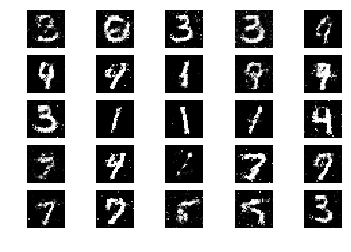

Epoch: 4850 Discriminator loss: 1.3273088 Generator loss: 0.72961485


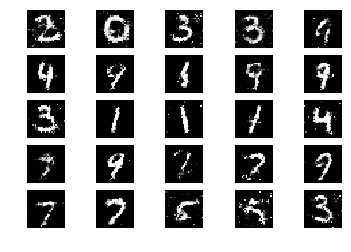

Epoch: 4900 Discriminator loss: 1.2852094 Generator loss: 0.81952995


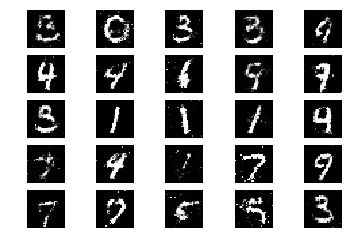

Epoch: 4950 Discriminator loss: 1.2588528 Generator loss: 1.0814954


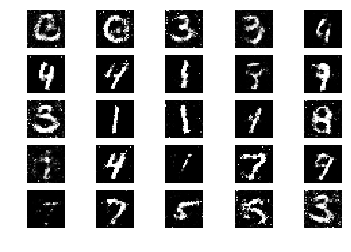

In [10]:
train(x_train,y_train)